# Novelty detection

The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.

- [2.7. Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html)  
- [One-class SVM with non-linear kernel (RBF)](https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#sphx-glr-auto-examples-svm-plot-oneclass-py)  
- [One Class SVM for Anomaly Detection | Unsupervised Machine Learning](https://www.youtube.com/watch?v=0IkFnHpUUjE&ab_channel=GrabNGoInfo)

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

import utils

## Base Line

When training the model we have to specify the percentage of defective individuals in the population (nu). We know that this ratio is approximatly equal to 0.008.

In [2]:
# Load data
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size = 0.3, random_state = 42)

# Create model
clf = svm.OneClassSVM(nu=0.008, kernel="rbf", gamma="auto")
clf.fit(X_train)

# Prediction
y_pred = clf.predict(X_test)
y_pred = [1 if i==-1 else 0 for i in y_pred]

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.04567841622404636

In [3]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 384 9879]
 [   3   89]]
              precision    recall  f1-score   support

           0       0.99      0.04      0.07     10263
           1       0.01      0.97      0.02        92

    accuracy                           0.05     10355
   macro avg       0.50      0.50      0.04     10355
weighted avg       0.98      0.05      0.07     10355



<AxesSubplot:>

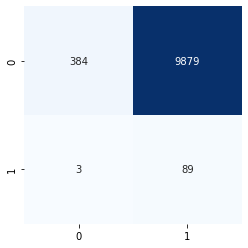

In [4]:
import seaborn as sns
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [5]:
# # Select index
# defect_index = train_output.index[train_output["result"] == 1].tolist()
# valid_index = train_output.index[train_output["result"] == 0].tolist()

# # Separate valide/defective individuals
# train_input_valid = train_input.iloc[valid_index,:]
# train_input_defect = train_input.iloc[defect_index,:]

# # Create training/testing set from valid individuals (80%/20%)
# training_index = np.random.choice(len(valid_index)-1, size=int(0.8*len(valid_index)), replace=False) # 80% training / 20% testing
# testing_index = []
# for i in range(len(valid_index)):
#     if i not in training_index:
#         testing_index.append(i)
# X_train = train_input_valid.iloc[training_index,:]
# X_test = train_input_valid.iloc[testing_index,:]

## Balanced Classes

There is now 50% anomalies in our dataset.

### Removing Individuals

In [6]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
train_input, train_output = utils.balanceClassesByRemoving(train_input, train_output)
X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size = 0.3, random_state = 42)

# Create model
clf = svm.OneClassSVM(nu=0.5, kernel="rbf", gamma="auto")
clf.fit(X_train)

# Prediction
y_pred = clf.predict(X_test)
y_pred = [1 if i==-1 else 0 for i in y_pred]

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.43169398907103823

In [7]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0 104]
 [  0  79]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.43      1.00      0.60        79

    accuracy                           0.43       183
   macro avg       0.22      0.50      0.30       183
weighted avg       0.19      0.43      0.26       183



/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

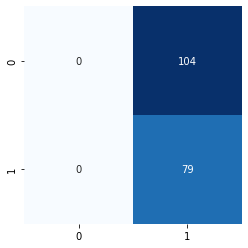

In [8]:
import seaborn as sns
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [9]:
# Get the scores for the testing dataset
score = clf.score_samples(X_test)

# Check the score for x% anomalies
percentage = 50
score_threshold = np.percentile(score, percentage)

# Check the model performance at x% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]

# Prediction performance
print(confusion_matrix(y_test, customized_prediction))
print(classification_report(y_test, customized_prediction))

[[51 53]
 [41 38]]
              precision    recall  f1-score   support

           0       0.55      0.49      0.52       104
           1       0.42      0.48      0.45        79

    accuracy                           0.49       183
   macro avg       0.49      0.49      0.48       183
weighted avg       0.50      0.49      0.49       183



### Duplicating Individuals

In [18]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size = 0.3, random_state = 42)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_train, y_train = utils.balanceClassesByDuplicating(X_train, y_train)

In [31]:
# Create model
clf = svm.OneClassSVM(nu=0.5, kernel="rbf", gamma="auto") # poly linear rbf sigmoid
clf.fit(X_train)

# Prediction
y_pred = clf.predict(X_test)
y_pred = [1 if i==-1 else 0 for i in y_pred]

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.021728633510381457

In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  135 10128]
 [    2    90]]
              precision    recall  f1-score   support

           0       0.99      0.01      0.03     10263
           1       0.01      0.98      0.02        92

    accuracy                           0.02     10355
   macro avg       0.50      0.50      0.02     10355
weighted avg       0.98      0.02      0.03     10355



<AxesSubplot:>

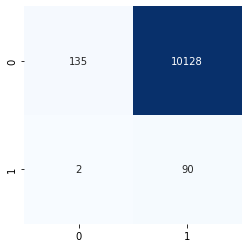

In [33]:
import seaborn as sns
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

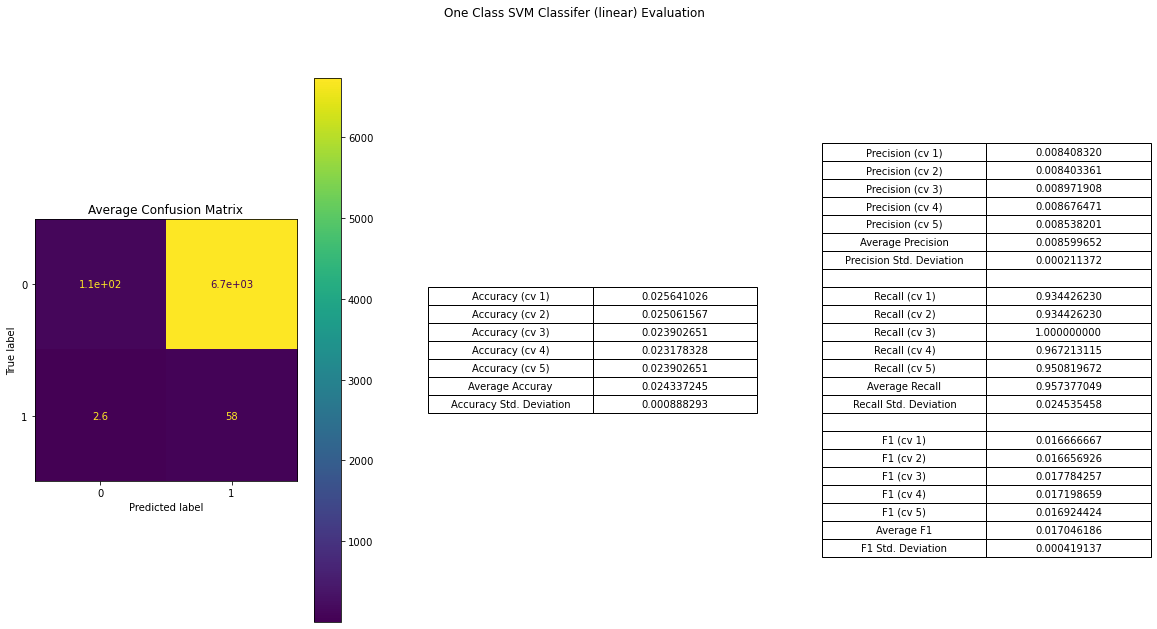

In [2]:
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
kernels = ["linear", "rbf", "poly", "sigmoid"]
for kernel in kernels:
    # Create model
    clf = svm.OneClassSVM(nu=0.5, kernel="rbf", gamma="auto") # poly linear rbf sigmoid
    utils.modelEvaluation(clf, train_input, train_output, balance_classes=True, scale_data=False, novelty_detection=True, model_name="One Class SVM Classifer (" + kernel + ")", fig_name="osvm_" + kernel + "_d")